# Topic 1 Overview of Machine Learning and Tensorflow

In [0]:
!pip install tensorflow-gpu==2.0.0 --upgrade

In [0]:
import tensorflow as tf
from tensorflow import keras

In [3]:
tf.__version__

'2.0.0'

In [0]:
# tf.executing_eagerly()

True

In [79]:
tf.test.gpu_device_name()

'/device:GPU:0'

### Set random seed

In [0]:
# # 1. Set `PYTHONHASHSEED` environment variable at a fixed value
# import os
# os.environ['PYTHONHASHSEED']=str(SEED)

# # 2. Set `python` built-in pseudo-random generator at a fixed value
# from random import seed
# seed(SEED)

# # 3. Set `numpy` pseudo-random generator at a fixed value
# import numpy as np
# np.random.seed(SEED)

# # 4. Set `tensorflow` pseudo-random generator at a fixed value
# from tensorflow import random
# random.set_seed(SEED)

# Topic 2 Basic Tensorflow Operations

In [0]:
a = [1, 1, 1]
b = [1, 1, 1]
# a-b

## Tensor and Constant

In [5]:
a = tf.constant(4)
a

<tf.Tensor: id=0, shape=(), dtype=int32, numpy=4>

In [6]:
a = tf.constant(4.5)
a

<tf.Tensor: id=1, shape=(), dtype=float32, numpy=4.5>

In [8]:
a = tf.constant(4.0, dtype=tf.float32)
a

<tf.Tensor: id=3, shape=(), dtype=float32, numpy=4.0>

In [13]:
a = tf.constant(4,dtype=tf.float32)
b = tf.constant(5.6,dtype=tf.float32)
c = a*b
c

<tf.Tensor: id=16, shape=(), dtype=float32, numpy=22.4>

In [16]:
c.numpy()

22.4

In [17]:
a = tf.constant([1,1,1], dtype=tf.float32)
b = tf.constant([2,2,2], dtype=tf.float32)
a-b

<tf.Tensor: id=19, shape=(3,), dtype=float32, numpy=array([-1., -1., -1.], dtype=float32)>

In [0]:
a = tf.constant([1,5])
a.numpy()

array([1, 5], dtype=int32)

## Variable

In [0]:
a = tf.Variable(0.0)

In [23]:
a

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.0>

In [0]:
a.numpy()

0.0

In [25]:
# Method 1
a.assign_add(2.2)
a.numpy()

4.2

In [0]:
a.assign_sub(1)
a.numpy()

-1.0

In [0]:
# Method 2
a.assign( a * 2)
a.numpy()

4.0

In [0]:
# Method 3
a = a+1
a.numpy()

5.0

In [0]:
a = tf.Variable(tf.zeros((2,2)))
a.numpy()

array([[0., 0.],
       [0., 0.]], dtype=float32)

## Gradient

In [0]:
def f(x):
  return x**3

In [27]:
f(2)

8

In [0]:
x = tf.Variable(6.0) # determine value of x
with tf.GradientTape() as g:
  y = f(x) # assign formula of y
dy_dx = g.gradient(y,x) # calculate gradient of y regarding x
dy_dx.numpy()  # 3*x^2

108.0

In [0]:
x = tf.constant(2.0)
with tf.GradientTape() as g:
  g.watch(x)
  y = f(x)
dy_dx = g.gradient(y,x)
dy_dx.numpy()  #3*x^2

12.0

## Matrix

In [18]:
a = tf.constant([[1,2],
                 [3,4]])
b = tf.constant([[5,6],
                 [7,8]])
c = tf.matmul(a,b)
c

<tf.Tensor: id=22, shape=(2, 2), dtype=int32, numpy=
array([[19, 22],
       [43, 50]], dtype=int32)>

## Exercise: Matrix

In [21]:
x = tf.constant([[1,2]]) # 1*2
w = tf.constant([[1,2],[3,4]]) # 2*2
b = tf.constant([[3,5]]) #1*2
y = tf.matmul(x,w)+b
y

<tf.Tensor: id=35, shape=(1, 2), dtype=int32, numpy=array([[10, 15]], dtype=int32)>

In [0]:
tf.matmul(x,w) # matrix multiplication

<tf.Tensor: id=151, shape=(1, 2), dtype=float32, numpy=array([[ 7., 10.]], dtype=float32)>

In [0]:
x*w # element-wise multiplication (dot product)

<tf.Tensor: id=152, shape=(2, 2), dtype=float32, numpy=
array([[1., 4.],
       [3., 8.]], dtype=float32)>

In [0]:
tf.multiply(x, w) # element-wise multiplication

<tf.Tensor: id=153, shape=(2, 2), dtype=float32, numpy=
array([[1., 4.],
       [3., 8.]], dtype=float32)>

## Graph Mode

In [0]:
W = tf.Variable(tf.ones((2,2)),dtype=tf.float32)
b = tf.Variable(tf.zeros((1,2)),dtype=tf.float32)

@tf.function
def nn(x):
  y = tf.matmul(x,W)+b
  return tf.nn.relu(y)

x = tf.constant([[1,0]],dtype=tf.float32)
y = nn(x)
y

<tf.Tensor: id=256, shape=(1, 2), dtype=float32, numpy=array([[1., 1.]], dtype=float32)>

In [0]:
@tf.function
def f(x):
  return x*x*x

x = tf.Variable(2.0)

with tf.GradientTape() as g:  
 y = f(x)
 
dy_dx = g.gradient(y,x)
dy_dx

<tf.Tensor: id=334, shape=(), dtype=float32, numpy=12.0>

In [0]:
a = tf.constant([1,2,3,4])

In [0]:
tf.argmax(a)

<tf.Tensor: id=353, shape=(), dtype=int64, numpy=3>

In [0]:
tf.reduce_sum(a)

<tf.Tensor: id=358, shape=(), dtype=int32, numpy=10>

In [0]:
tf.reduce_mean(a)

<tf.Tensor: id=360, shape=(), dtype=int32, numpy=2>

In [0]:
a = tf.random.normal([2,3])
a

<tf.Tensor: id=378, shape=(2, 3), dtype=float32, numpy=
array([[-1.4246248 ,  0.02565097, -0.22373931],
       [ 0.9777216 ,  0.63972527,  2.1979625 ]], dtype=float32)>

In [0]:
a = tf.random.uniform([2,3])
a

<tf.Tensor: id=385, shape=(2, 3), dtype=float32, numpy=
array([[0.05837739, 0.714713  , 0.64648116],
       [0.6283643 , 0.66727126, 0.4701059 ]], dtype=float32)>

# Topic 3 Datasets

## MNIST dataset

In [28]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
x_train.shape

(60000, 28, 28)

In [0]:
# x_train[0]

In [0]:
# x_train, x_test = x_train / 255.0, x_test / 255.0

# # x_train= x_train / 255.0
# # x_test = x_test / 255.0

In [31]:
y_train.shape

(60000,)

In [32]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

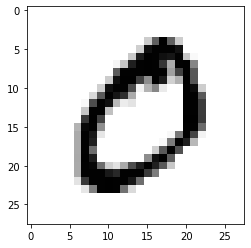

In [35]:
import matplotlib.pyplot as plt
plt.imshow(x_train[1], cmap=plt.cm.binary)

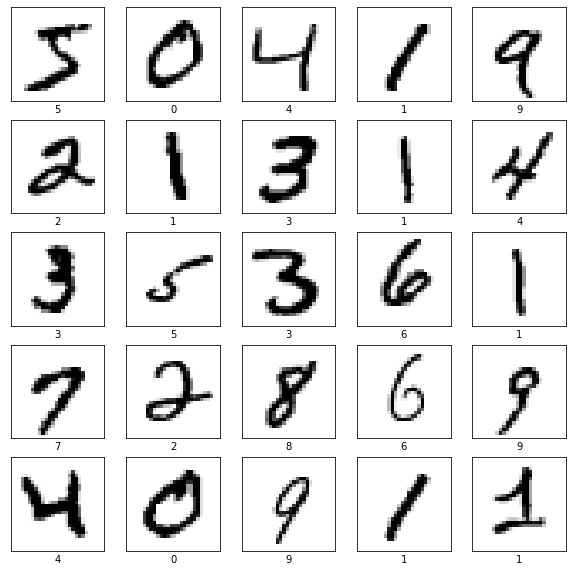

In [0]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

#### One Hot Encoding

In [0]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)

In [0]:
y_train[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [0]:
y_train.shape

(60000, 10)

## Fashion MNIST dataset

In [0]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [0]:
y_train[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [0]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

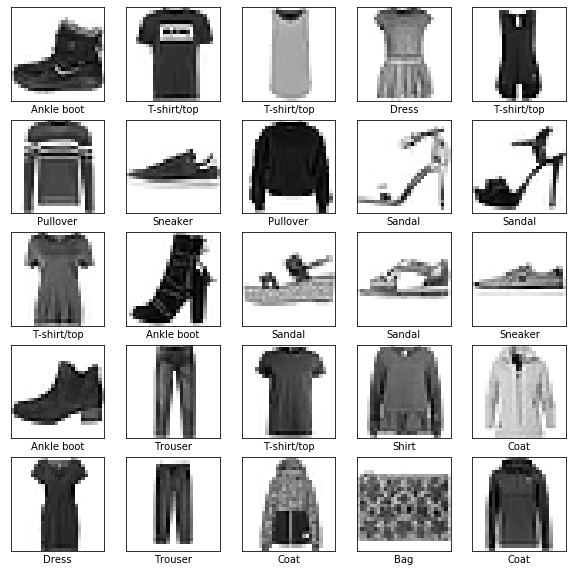

In [0]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

## CIFAR dataset

In [6]:
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 13s 0us/step


In [7]:
x_train.shape, y_train.shape

((50000, 32, 32, 3), (50000, 1))

In [0]:
x_train[0]

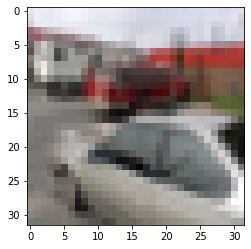

In [15]:
# import matplotlib.pyplot as plt
plt.imshow(x_train[49999])

In [0]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

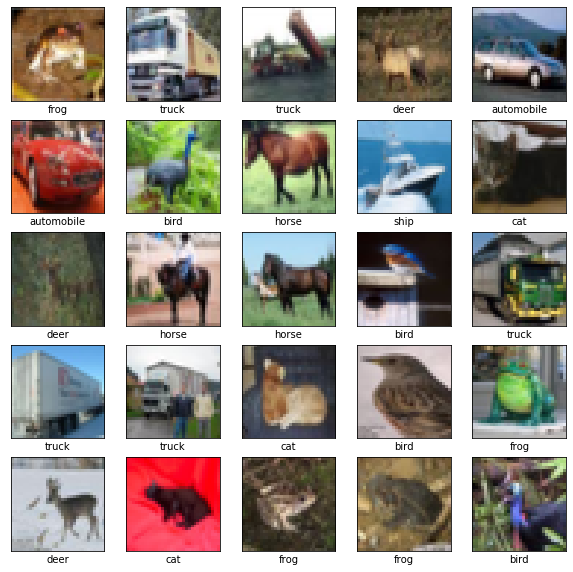

In [0]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    plt.xlabel(class_names[y_train[i][0]])
plt.show()

## IMDB Dataset

In [0]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

max_features = 20000
maxlen = 80
batch_size = 32

# Loading data
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

Loading data...
17465344/17464789 [==============================] - 0s 0us/step
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 80)
x_test shape: (25000, 80)


In [0]:
len(x_train), len(x_test)

(25000, 25000)

# Topic 4 Neural Networks for Regression

### Prepare the data

In [0]:
import pandas as pd
path = "BostonHousing.csv"                     
dataset = pd.read_csv(path)
dataset # pandas Dataframe

In [20]:
dataset.head()

crim    zn  indus  chas    nox  ...  tax  ptratio       b  lstat  medv
0  0.00632  18.0   2.31     0  0.538  ...  296     15.3  396.90   4.98  24.0
1  0.02731   0.0   7.07     0  0.469  ...  242     17.8  396.90   9.14  21.6
2  0.02729   0.0   7.07     0  0.469  ...  242     17.8  392.83   4.03  34.7
3  0.03237   0.0   2.18     0  0.458  ...  222     18.7  394.63   2.94  33.4
4  0.06905   0.0   2.18     0  0.458  ...  222     18.7  396.90   5.33  36.2

[5 rows x 14 columns]

In [0]:
dataset.describe()

In [18]:
# Check missing data
dataset.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [0]:
# Split the data to train and test dataset
x_train = dataset.sample(frac=0.7, random_state=0) # pseudorandom for reproducibility
x_test = dataset.drop(x_train.index)

In [30]:
x_train.head()

crim   zn  indus  chas    nox  ...  tax  ptratio       b  lstat  medv
329   0.06724  0.0   3.24     0  0.460  ...  430     16.9  375.21   7.34  22.6
371   9.23230  0.0  18.10     0  0.631  ...  666     20.2  366.15   9.53  50.0
219   0.11425  0.0  13.89     1  0.550  ...  276     16.4  393.74  10.50  23.0
403  24.80170  0.0  18.10     0  0.693  ...  666     20.2  396.90  19.77   8.3
78    0.05646  0.0  12.83     0  0.437  ...  398     18.7  386.40  12.34  21.2

[5 rows x 14 columns]

In [31]:
x_test.head()

crim    zn  indus  chas    nox  ...  tax  ptratio       b  lstat  medv
0   0.00632  18.0   2.31     0  0.538  ...  296     15.3  396.90   4.98  24.0
9   0.17004  12.5   7.87     0  0.524  ...  311     15.2  386.71  17.10  18.9
11  0.11747  12.5   7.87     0  0.524  ...  311     15.2  396.90  13.27  18.9
23  0.98843   0.0   8.14     0  0.538  ...  307     21.0  394.54  19.88  14.5
25  0.84054   0.0   8.14     0  0.538  ...  307     21.0  303.42  16.51  13.9

[5 rows x 14 columns]

In [0]:
# Create input and output
y_train = x_train.pop('medv')
y_test = x_test.pop('medv')

In [0]:
# Normalize the data
# x_train = (x_train - x_train.mean())/x_train.std()
# x_test = (x_test - x_train.mean())/x_train.std()

# OR
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train[x_train.columns] = sc.fit_transform(x_train)
x_test[x_train.columns] = sc.transform(x_test)

In [34]:
sc.fit_transform(x_train)

array([[-0.39341441, -0.48091427, -1.19701623, ..., -0.7273034 ,
         0.23517308, -0.75232309],
       [ 0.58105446, -0.48091427,  1.04176187, ...,  0.80994254,
         0.14043188, -0.43992566],
       [-0.3884161 , -0.48091427,  0.40749163, ..., -0.96021945,
         0.42894289, -0.30155785],
       ...,
       [-0.39619053,  0.60426964, -0.95295025, ...,  0.25094402,
         0.46198728, -1.0447499 ],
       [-0.39531974,  0.95152849, -1.35671373, ..., -0.02855524,
         0.46198728, -0.72522012],
       [-0.3300164 ,  0.38723286, -1.08703588, ..., -2.5440486 ,
         0.31966634, -0.68813184]])

In [35]:
x_train.describe()

crim            zn  ...             b         lstat
count  3.540000e+02  3.540000e+02  ...  3.540000e+02  3.540000e+02
mean   3.042137e-17 -1.685720e-16  ... -5.083818e-16 -1.815873e-16
std    1.001415e+00  1.001415e+00  ...  1.001415e+00  1.001415e+00
min   -3.996004e-01 -4.809143e-01  ... -3.661242e+00 -1.552574e+00
25%   -3.917645e-01 -4.809143e-01  ...  2.209776e-01 -7.512532e-01
50%   -3.713803e-01 -4.809143e-01  ...  3.997153e-01 -2.038445e-01
75%   -7.337232e-02  6.167768e-02  ...  4.549287e-01  5.735829e-01
max    9.059771e+00  3.642785e+00  ...  4.619873e-01  3.616961e+00

[8 rows x 13 columns]

### Build the model

In [0]:
from tensorflow.keras.models import Sequential # take it as an empty container
from tensorflow.keras.layers import Dense # take it as a layer

In [40]:
x_train.shape[1]

13

In [0]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=[x_train.shape[1]] )) # first hidden layer
model.add(Dense(64, activation='relu')) # second hidden layer
model.add(Dense(1, activation='linear')) # output layer

In [76]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 64)                896       
_________________________________________________________________
dense_10 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


In [0]:
# model = Sequential([
#     Dense(64,activation='relu',input_shape=[x_train.shape[1]]),
#     Dense(64,activation='relu'),
#     Dense(1,activation='linear')
# ])

### Visualize the Model

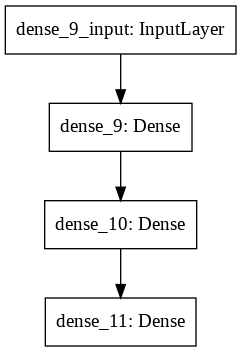

In [78]:
keras.utils.plot_model(model, 'model.png')

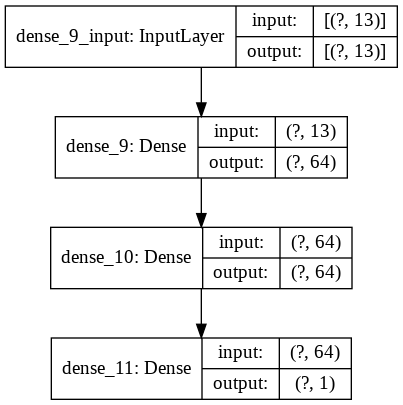

In [79]:
keras.utils.plot_model(model, 'model.png', show_shapes=True)

In [0]:
# model.compile(loss='mse', optimizer='SGD', metrics=['mae', 'mse'])
model.compile(loss='mse', optimizer='adam', metrics=['mae', 'mse'])
# mse --> mean squared error
# mae --> mean absolute error

### Train the model

In [81]:
history = model.fit(x_train, y_train,
                    epochs = 20, 
                    batch_size = 32, 
                    shuffle = True, 
                    verbose = 0,
                    validation_data = (x_test,y_test))

### Evaluate the model

In [0]:
# history.history

In [0]:
mae = history.history['mae']
val_mae = history.history['val_mae']
epoch = list(range(len(mae)))

In [84]:
mae

[21.802961,
 20.741419,
 19.454473,
 17.792225,
 15.682046,
 12.954739,
 10.028304,
 7.585602,
 6.1028943,
 5.223403,
 4.531459,
 4.00993,
 3.645582,
 3.443411,
 3.3305671,
 3.278117,
 3.1907146,
 3.1426477,
 3.0756488,
 3.0255609]

In [85]:
val_mae

[21.775856,
 20.599417,
 19.02142,
 16.931374,
 14.312305,
 11.274044,
 8.11064,
 5.9283752,
 5.0007677,
 4.454417,
 4.11504,
 3.7823558,
 3.615599,
 3.5681398,
 3.5452793,
 3.546395,
 3.445984,
 3.4564574,
 3.3689876,
 3.3131232]

In [86]:
epoch

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

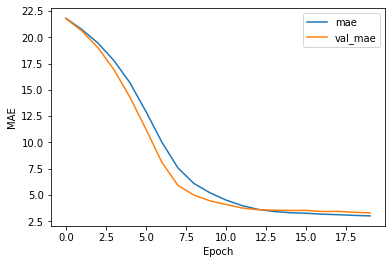

In [87]:
import matplotlib.pyplot as plt

plt.plot(epoch, mae, label='mae')
plt.plot(epoch, val_mae, label='val_mae')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.show()

In [88]:
loss, mae, mse = model.evaluate(x_test, y_test, verbose=2)
loss, mae, mse**0.5

152/152 - 0s - loss: 23.5038 - mae: 3.3131 - mse: 23.5038


(23.50383156224301, 3.3131227, 4.848074871127166)

### Make Prediction

In [0]:
y_pred = model.predict(x_test)
y_pred

In [0]:
y_pred.flatten()

In [0]:
y_pred = model.predict(x_test).flatten()

plt.scatter(y_test, y_pred)
plt.xlabel('True Values [Housing Price]')
plt.ylabel('Predictions [Housing Price]')
plt.axis('square')
plt.xlim([0, 60])
plt.ylim([0, 60])
plt.plot([0, 60], [0, 60]) #plot a line from (0,0) to (60,60)

### Save the Model in HDF5 Format

In [0]:
model.save("regression.h5")

### Load the Model

In [0]:
new_model = keras.models.load_model('regression.h5')
new_model.summary()

### Save the Model in SavedModel Format

In [101]:
model.save("regression")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: regression/assets


In [0]:
new_model = keras.models.load_model('regression')
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                896       
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


### Save and Load Weighta

In [0]:
# Save the weights
model.save_weights('./regression/1/w')

In [0]:
model = Sequential([
    Dense(64,activation='relu',input_shape=[x_train.shape[1]]),
    Dense(64,activation='relu'),
    Dense(1,activation='linear')
])
optimizer = tf.keras.optimizers.RMSprop()
model.compile(loss='mse',optimizer=optimizer,metrics=['mae', 'mse'])

In [0]:
# Restore the weights
model.load_weights('./regression/1/w')

In [0]:
loss, mae, mse = model.evaluate(x_test, y_test, verbose=2)
loss, mae, mse

152/152 - 0s - loss: 10.8454 - mae: 2.3218 - mse: 10.8454


(10.845427362542404, 2.3217716, 10.8454275)

### Exercise: Predictive Regression Model

In [111]:
import pandas as pd  
dataset = pd.read_csv("iris.csv")
dataset.head()

SepalLength  SepalWidth  PetalLength  PetalWidth         Name
0          5.1         3.5          1.4         0.2  Iris-setosa
1          4.9         3.0          1.4         0.2  Iris-setosa
2          4.7         3.2          1.3         0.2  Iris-setosa
3          4.6         3.1          1.5         0.2  Iris-setosa
4          5.0         3.6          1.4         0.2  Iris-setosa

In [112]:
dataset.pop('Name')
dataset.head()

SepalLength  SepalWidth  PetalLength  PetalWidth
0          5.1         3.5          1.4         0.2
1          4.9         3.0          1.4         0.2
2          4.7         3.2          1.3         0.2
3          4.6         3.1          1.5         0.2
4          5.0         3.6          1.4         0.2

In [0]:
x_train = dataset.sample(frac=0.7, random_state=0)
x_test = dataset.drop(x_train.index)

In [0]:
y_train = x_train.pop('SepalWidth')
y_test = x_test.pop('SepalWidth')

In [0]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
x_train[x_train.columns] = sc.fit_transform(x_train)
x_test[x_train.columns] = sc.transform(x_test)

In [0]:
# x_train.head()

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [155]:
x_train.shape[1]

3

In [0]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=[x_train.shape[1]]))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

In [0]:
model.compile(loss='mse',optimizer='adam',metrics=['mae'])

In [0]:
# model.summary()

In [0]:
history = model.fit(x_train, y_train,
                    epochs=100,
                    # batch_size = 32, # by default
                    shuffle=True, 
                    validation_data=(x_test,y_test))

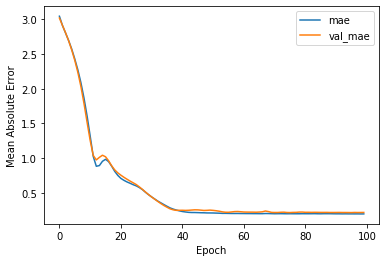

In [160]:
mae = history.history['mae']
val_mae = history.history['val_mae']
epoch = range(len(mae))

import matplotlib.pyplot as plt

plt.plot(epoch,mae,label='mae')
plt.plot(epoch,val_mae,label='val_mae')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.show()

In [164]:
loss, mae = model.evaluate(x_test, y_test, verbose=1)
loss, mae

45/45 [==============================] - 0s 187us/sample - loss: 0.0818 - mae: 0.2220


(0.08183609479003483, 0.22200106)

In [0]:
y_pred = model.predict(x_test).flatten()

plt.scatter(y_test, y_pred)
plt.xlabel('True Values [Sepal Width]')
plt.ylabel('Predictions [Sepal Width]')
plt.axis('square')
plt.xlim([2,5])
plt.ylim([2,5])
plt.plot([0, 100], [0, 100])

In [0]:
model.save("iris.h5")

# tf.saved_model.save(model, "iris")

In [0]:
new_model = keras.models.load_model('iris.h5')

In [170]:
new_model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 64)                256       
_________________________________________________________________
dense_25 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_26 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 33        
Total params: 3,425
Trainable params: 3,425
Non-trainable params: 0
_________________________________________________________________


In [173]:
new_model.predict([[1, 2, 3]])

array([[5.0867968]], dtype=float32)

# Topic 5 Neural Network for Classification

## NN Demo on MNIST dataset

In [174]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255, x_test / 255 # same as MinMaxScaler ==> [0,1]

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
x_train.shape

(60000, 28, 28)

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [0]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [0]:
model.summary()

In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# y_true = [1,1,0]
# y_pred = [1,0,0]
# 2/3

In [180]:
history = model.fit(x_train, y_train, 
                    epochs = 10, 
                    validation_data = (x_test,y_test))

60000/60000 [==============================] - 5s 84us/sample - loss: 0.0297 - accuracy: 0.9897 - val_loss: 0.1048 - val_accuracy: 0.9732


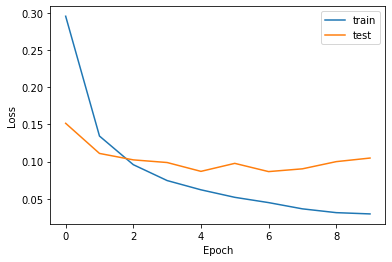

In [182]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epoch = range(len(loss))

plt.plot(epoch, loss, label='train')
plt.plot(epoch, val_loss, label='test')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

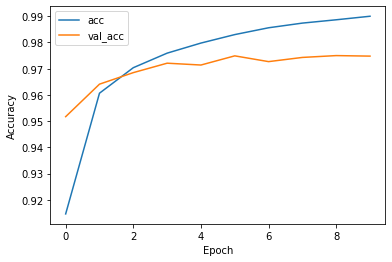

In [0]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epoch = range(len(acc))

plt.plot(epoch,acc,label='acc')
plt.plot(epoch,val_acc,label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [0]:
loss,acc = model.evaluate(x_test, y_test, verbose=0)

In [184]:
loss,acc = model.evaluate(x_test, y_test, verbose=1)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [187]:
loss,acc = model.evaluate(x_test, y_test, verbose=2, batch_size = 10000)

10000/1 - 0s - loss: 0.1048 - accuracy: 0.9732


In [186]:
loss,acc

(0.10483161677010794, 0.9732)

In [0]:
y_pred = model.predict(x_test)

In [189]:
y_pred

array([[2.81839743e-11, 7.71912118e-11, 6.58786064e-07, ...,
        9.99997377e-01, 1.54022732e-11, 1.41893815e-06],
       [4.94637534e-12, 3.50856979e-08, 9.99999762e-01, ...,
        1.23566291e-17, 2.85412199e-07, 3.38119220e-20],
       [6.08534867e-09, 9.99957561e-01, 2.79698975e-06, ...,
        2.83594254e-05, 1.07520409e-05, 3.15464188e-09],
       ...,
       [1.07068365e-11, 3.76387636e-12, 3.09267911e-13, ...,
        4.90311379e-07, 7.41182449e-09, 1.01721362e-05],
       [8.70046358e-14, 2.25963911e-14, 2.22902378e-14, ...,
        8.88145876e-11, 3.67283555e-08, 3.14524575e-17],
       [1.67275197e-13, 1.13611333e-15, 2.78772990e-13, ...,
        1.23576386e-22, 3.70791176e-11, 1.38968504e-18]], dtype=float32)

In [190]:
import numpy as np
np.argmax([1, 3, 0])

1

In [191]:
np.argmax(y_pred[0])

7

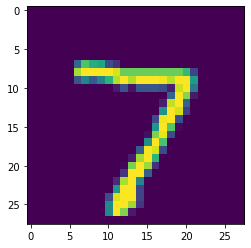

In [192]:
plt.imshow(x_test[0])

In [198]:
np.argmax(y_pred, axis = 1)

array([7, 2, 1, ..., 4, 5, 6])

In [0]:
model.save("mnist.h5")

# tf.saved_model.save(model, "/model_mnist/1/")

In [0]:
new_model =keras.models.load_model('mnist.h5')

In [0]:
new_model.summary()

#### Sparse Cross Entropy vs Cross Entropy

In [0]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [0]:
from keras.utils import to_categorical
y_train,y_test = to_categorical(y_train), to_categorical(y_test)

Using TensorFlow backend.


In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [0]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [0]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [0]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 95us/sample - loss: 0.3103 - accuracy: 0.9085 - val_loss: 0.1645 - val_accuracy: 0.9486
Epoch 2/10
60000/60000 [==============================] - 5s 88us/sample - loss: 0.1380 - accuracy: 0.9581 - val_loss: 0.1253 - val_accuracy: 0.9603
Epoch 3/10
60000/60000 [==============================] - 5s 88us/sample - loss: 0.1012 - accuracy: 0.9693 - val_loss: 0.1056 - val_accuracy: 0.9655
Epoch 4/10
60000/60000 [==============================] - 5s 89us/sample - loss: 0.0803 - accuracy: 0.9751 - val_loss: 0.1009 - val_accuracy: 0.9696
Epoch 5/10
60000/60000 [==============================] - 5s 89us/sample - loss: 0.0658 - accuracy: 0.9796 - val_loss: 0.0983 - val_accuracy: 0.9699
Epoch 6/10
60000/60000 [==============================] - 5s 89us/sample - loss: 0.0551 - accuracy: 0.9826 - val_loss: 0.0938 - val_accuracy: 0.9728
Epoch 7/10
60000/60000 [==============================] 

## Iris Demo

In [0]:
import pandas as pd
dataset_path = "iris.csv"
                     
dataset = pd.read_csv(dataset_path)
dataset.head()

SepalLength  SepalWidth  PetalLength  PetalWidth         Name
0          5.1         3.5          1.4         0.2  Iris-setosa
1          4.9         3.0          1.4         0.2  Iris-setosa
2          4.7         3.2          1.3         0.2  Iris-setosa
3          4.6         3.1          1.5         0.2  Iris-setosa
4          5.0         3.6          1.4         0.2  Iris-setosa

In [0]:
dataset['Name'].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Name, dtype: int64

In [0]:
x_train = dataset.sample(frac = 0.7, random_state = 0)
x_test = dataset.drop(x_train.index)

In [0]:
y_train = x_train.pop('Name')
y_test = x_test.pop('Name')

In [0]:
# print(y_train)

In [0]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [0]:
y_train[:100]

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1, 1, 1, 2, 0, 2, 0,
       0, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 0, 2, 1, 1, 1,
       1, 2, 0, 0, 2, 1, 0, 0, 1, 0, 2, 1, 0, 1, 2, 1, 0, 2, 2, 2, 2, 0,
       0, 2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0])

In [0]:
le.classes_

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

## Ex: Classification for Fashsion MNIST dataset

In [0]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [0]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [0]:
# model.summary()

In [0]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [0]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 9s 150us/sample - loss: 0.4991 - accuracy: 0.8198 - val_loss: 0.4143 - val_accuracy: 0.8474
Epoch 2/10
60000/60000 [==============================] - 7s 114us/sample - loss: 0.3699 - accuracy: 0.8644 - val_loss: 0.4133 - val_accuracy: 0.8518
Epoch 3/10
60000/60000 [==============================] - 7s 114us/sample - loss: 0.3367 - accuracy: 0.8740 - val_loss: 0.3993 - val_accuracy: 0.8483
Epoch 4/10
60000/60000 [==============================] - 7s 114us/sample - loss: 0.3135 - accuracy: 0.8828 - val_loss: 0.3705 - val_accuracy: 0.8637
Epoch 5/10
60000/60000 [==============================] - 7s 115us/sample - loss: 0.2980 - accuracy: 0.8892 - val_loss: 0.3366 - val_accuracy: 0.8787
Epoch 6/10
60000/60000 [==============================] - 7s 115us/sample - loss: 0.2824 - accuracy: 0.8947 - val_loss: 0.3660 - val_accuracy: 0.8750
Epoch 7/10
60000/60000 [==========================

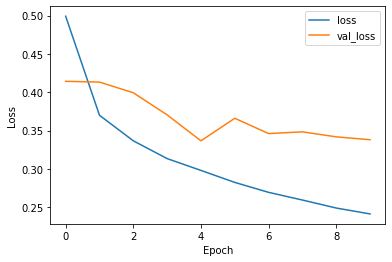

In [0]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epoch = range(len(loss))

plt.plot(epoch,loss,label='loss')
plt.plot(epoch,val_loss,label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

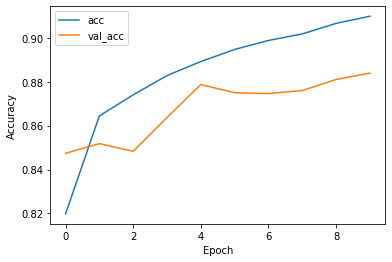

In [0]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epoch = range(len(loss))
plt.plot(epoch,acc,label='acc')
plt.plot(epoch,val_acc,label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [0]:
loss,acc = model.evaluate(x_test,  y_test, verbose=2)
loss,acc

10000/1 - 1s - loss: 0.2041 - accuracy: 0.8839


(0.33807221891880035, 0.8839)

In [0]:
y_pred = model.predict(x_test)
y_pred

array([[5.14224974e-09, 8.59638583e-09, 3.35847927e-09, ...,
        1.15393859e-03, 3.08913641e-08, 9.98210907e-01],
       [3.29213872e-05, 5.75047121e-10, 9.98336494e-01, ...,
        8.34553790e-19, 4.88483387e-09, 6.40951625e-20],
       [3.39684823e-13, 1.00000000e+00, 2.30930067e-11, ...,
        4.50038704e-12, 3.55643195e-13, 3.15210477e-13],
       ...,
       [1.17192922e-05, 2.31355962e-10, 1.15502655e-06, ...,
        1.01011751e-11, 9.99978662e-01, 7.01743568e-12],
       [3.96779345e-11, 9.99999881e-01, 9.07278086e-10, ...,
        6.55561871e-09, 4.29769498e-10, 4.20188471e-08],
       [4.69920406e-06, 1.11784915e-10, 1.20217846e-05, ...,
        3.21220665e-04, 1.97533427e-06, 3.78976038e-05]], dtype=float32)

In [0]:
y_pred[0]

array([5.8287087e-06, 1.4295197e-05, 3.2628936e-06, 1.5634749e-06,
       1.2774635e-05, 6.9404166e-04, 2.5367999e-06, 5.8518976e-02,
       8.4219482e-06, 9.4073832e-01], dtype=float32)

In [0]:
y_pred[0].sum()

1.0

In [0]:
y_pred[0].argmax()

9

In [0]:
import numpy as np
np.array([0, 1, 0, 0.5]).argmax()

1

In [0]:
import numpy as np
np.array([[0, 1, 0, 0.5],
          [0, 1, 2, 0.5]]).argmax(axis = 1)

array([1, 2])

In [0]:
y_pred.argmax(axis = 1)

array([9, 2, 1, ..., 8, 1, 5])

In [0]:
# model.save("classifcation_model_fashion_mnist.h5")

tf.saved_model.save(model, "/model_fashion_mnist")

INFO:tensorflow:Assets written to: /model_fashion_mnist/1/assets


# Topic 6 Convolutional Neural Network (CNN)

## CNN on MNIST dataset

In [0]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255, x_test / 255

In [5]:
x_train.shape

(60000, 28, 28)

In [0]:
# Add a channels dimension
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

In [8]:
x_train.shape

(60000, 28, 28, 1)

In [0]:
# x_train[0]

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Initialize an empty container
model = Sequential()

# Add convolutional and pooling layers
model.add(Conv2D(16, (3, 3), activation='relu', padding='same', 
                 input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Flatten (Vectorization)
model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1568)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                100416    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                6

In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
history = model.fit(x_train, y_train, 
                    epochs=10,
                    validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 13s 221us/sample - loss: 0.1690 - accuracy: 0.9494 - val_loss: 0.0578 - val_accuracy: 0.9806
Epoch 2/10
60000/60000 [==============================] - 6s 102us/sample - loss: 0.0540 - accuracy: 0.9830 - val_loss: 0.0565 - val_accuracy: 0.9803
Epoch 3/10
60000/60000 [==============================] - 6s 101us/sample - loss: 0.0383 - accuracy: 0.9874 - val_loss: 0.0373 - val_accuracy: 0.9886
Epoch 4/10
60000/60000 [==============================] - 6s 102us/sample - loss: 0.0288 - accuracy: 0.9912 - val_loss: 0.0414 - val_accuracy: 0.9861
Epoch 5/10
60000/60000 [==============================] - 6s 100us/sample - loss: 0.0229 - accuracy: 0.9925 - val_loss: 0.0329 - val_accuracy: 0.9896
Epoch 6/10
60000/60000 [==============================] - 6s 100us/sample - loss: 0.0174 - accuracy: 0.9942 - val_loss: 0.0352 - val_accuracy: 0.9895
Epoch 7/10
60000/60000 [=========================

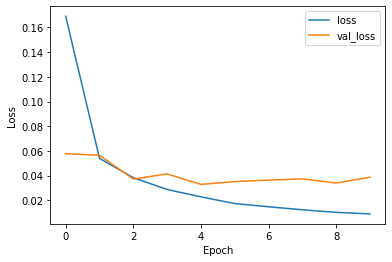

In [18]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epoch = range(len(loss))

plt.plot(epoch,loss,label='loss')
plt.plot(epoch,val_loss,label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

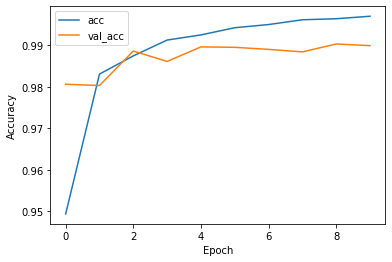

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epoch = range(len(acc))

plt.plot(epoch,acc,label='acc')
plt.plot(epoch,val_acc,label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [21]:
loss,acc = model.evaluate(x_test,  y_test, verbose=2)
loss,acc

10000/1 - 1s - loss: 0.0194 - accuracy: 0.9899


(0.038753630371482585, 0.9899)

In [22]:
y_pred = model.predict(x_test)
y_pred[:10]

array([[3.9419385e-17, 1.1965444e-11, 4.6047957e-10, 1.0861490e-10,
        4.5189787e-14, 7.9731245e-15, 1.9709173e-19, 1.0000000e+00,
        1.1607120e-13, 1.2954601e-10],
       [9.7179296e-13, 2.1543971e-12, 1.0000000e+00, 1.8425212e-20,
        6.3311016e-15, 1.0326425e-20, 1.3620347e-10, 9.8892282e-16,
        5.9480157e-16, 1.0366451e-19],
       [4.6231938e-07, 9.9997473e-01, 3.4534423e-08, 3.8088019e-10,
        3.2781995e-06, 2.3029953e-08, 4.4046922e-09, 1.1178727e-06,
        2.0435453e-05, 4.3616541e-09],
       [9.9995697e-01, 4.4285547e-13, 6.2735700e-13, 4.1373415e-13,
        2.0628520e-15, 1.9748743e-11, 4.2979274e-05, 3.7823735e-15,
        3.4593053e-13, 6.4090516e-10],
       [2.6619776e-12, 4.8049467e-11, 1.4629223e-09, 3.2286307e-13,
        9.9999905e-01, 9.9757160e-13, 1.3707300e-14, 6.3387205e-11,
        5.0101989e-12, 9.4834229e-07],
       [1.7067231e-08, 9.9996853e-01, 4.1601238e-09, 2.1041204e-11,
        1.0340196e-06, 1.6310642e-10, 8.0157977e-11, 2.75

## Ex: CNN on CIFAR dataset

### Import and Normalize data

In [0]:
cifar10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255, x_test / 255

170500096/170498071 [==============================] - 6s 0us/step


In [25]:
x_train.shape

(50000, 32, 32, 3)

In [0]:
# x_train[0]

### Build the Model

- conv 1 3x3 32 filters with 2x2 max pool
- conv 2 3x3 64 filters with 2x2 max pool
- (flatten)
- fc  - 128 neurons
- fc - softmax output layer


In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()

model.add(Conv2D(32, 3, activation='relu', padding='same', 
                 input_shape=(32, 32, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(64, 3, activation='relu', padding='same'))
model.add(MaxPooling2D())

model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [32]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)              

In [0]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

### Train the Model

In [34]:
history = model.fit(x_train, y_train, 
                    epochs=10,
                    validation_data=(x_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 8s 162us/sample - loss: 1.4148 - accuracy: 0.4942 - val_loss: 1.1100 - val_accuracy: 0.6022
Epoch 2/10
50000/50000 [==============================] - 7s 145us/sample - loss: 1.1049 - accuracy: 0.6090 - val_loss: 0.9680 - val_accuracy: 0.6610
Epoch 3/10
50000/50000 [==============================] - 7s 143us/sample - loss: 0.9772 - accuracy: 0.6532 - val_loss: 0.9371 - val_accuracy: 0.6717
Epoch 4/10
50000/50000 [==============================] - 7s 142us/sample - loss: 0.8929 - accuracy: 0.6860 - val_loss: 0.8968 - val_accuracy: 0.6848
Epoch 5/10
50000/50000 [==============================] - 7s 143us/sample - loss: 0.8251 - accuracy: 0.7101 - val_loss: 0.8195 - val_accuracy: 0.7162
Epoch 6/10
50000/50000 [==============================] - 7s 141us/sample - loss: 0.7731 - accuracy: 0.7287 - val_loss: 0.8264 - val_accuracy: 0.7155
Epoch 7/10
50000/50000 [==========================

### Evaluate the Model

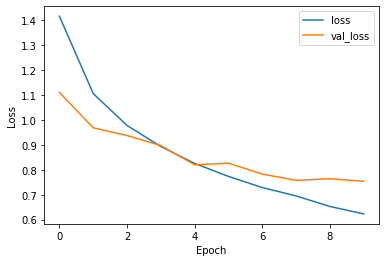

In [35]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epoch = range(len(loss))

plt.plot(epoch,loss,label='loss')
plt.plot(epoch,val_loss,label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

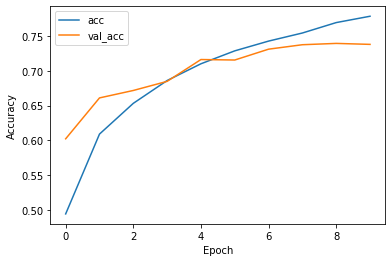

In [36]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epoch = range(len(acc))

plt.plot(epoch,acc,label='acc')
plt.plot(epoch,val_acc,label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [37]:
loss,acc = model.evaluate(x_test,  y_test, verbose=2)
loss,acc

10000/1 - 1s - loss: 0.7323 - accuracy: 0.7380


(0.7538966923713684, 0.738)

## CNN on Small Dataset: Cats and Dogs

### Import the data

In [4]:
URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

path_to_zip = tf.keras.utils.get_file('cats_and_dogs_filtered.zip', origin=URL, extract=True)

68608000/68606236 [==============================] - 0s 0us/step


In [5]:
path_to_zip

'/root/.keras/datasets/cats_and_dogs_filtered.zip'

In [0]:
PATH = path_to_zip.replace('.zip', '')

In [7]:
PATH

'/root/.keras/datasets/cats_and_dogs_filtered'

In [0]:
train_dir = PATH + '/train'
validation_dir = PATH + '/validation'

In [9]:
train_dir

'/root/.keras/datasets/cats_and_dogs_filtered/train'

### Image Generator

In [0]:
def generate_even():
  for i in range(10):
    yield i*2

In [0]:
g = generate_even()

In [14]:
next(g)

4

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_image_generator = ImageDataGenerator(rescale=1/255) 
validation_image_generator = ImageDataGenerator(rescale=1/255) 

In [16]:
IMG_HEIGHT = 150
IMG_WIDTH = 150
BATCH_SIZE = 128

train_data_gen = train_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

val_data_gen = validation_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [17]:
train_data_gen.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [18]:
train_data_gen.class_indices

{'cats': 0, 'dogs': 1}

### Visualize the raw images 

In [0]:
batch_images, batch_labels = next(train_data_gen)

In [22]:
batch_labels

array([1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0.,
       0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)

In [23]:
batch_images.shape

(128, 150, 150, 3)

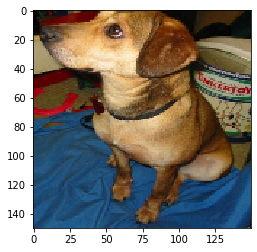

In [24]:
import matplotlib.pyplot as plt
plt.imshow(batch_images[0])

In [0]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

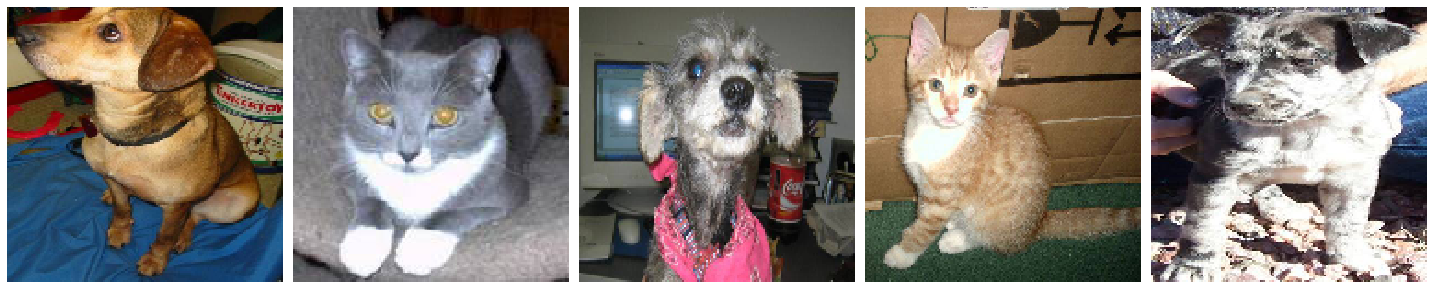

In [36]:
plotImages(batch_images[:5])

### Build the Model

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()

model.add(Conv2D(16, 3, padding='same', activation='relu', 
                 input_shape = (IMG_HEIGHT, IMG_WIDTH,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, 3, padding='same', activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64, 3, padding='same', activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [0]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

### Train the Model

In [27]:
history = model.fit_generator(
    train_data_gen,
    epochs=15,
    validation_data=val_data_gen,
)

16/16 [==============================] - 8s 522ms/step - loss: 0.3897 - accuracy: 0.8325 - val_loss: 0.6277 - val_accuracy: 0.7030
Epoch 8/15
16/16 [==============================] - 9s 537ms/step - loss: 0.3121 - accuracy: 0.8750 - val_loss: 0.6176 - val_accuracy: 0.7130
Epoch 9/15
16/16 [==============================] - 8s 509ms/step - loss: 0.2689 - accuracy: 0.8935 - val_loss: 0.6374 - val_accuracy: 0.7170
Epoch 10/15
16/16 [==============================] - 8s 506ms/step - loss: 0.2322 - accuracy: 0.9095 - val_loss: 0.7618 - val_accuracy: 0.6910
Epoch 11/15
16/16 [==============================] - 8s 521ms/step - loss: 0.2077 - accuracy: 0.9235 - val_loss: 0.7597 - val_accuracy: 0.7030
Epoch 12/15
16/16 [==============================] - 8s 524ms/step - loss: 0.1711 - accuracy: 0.9435 - val_loss: 0.7891 - val_accuracy: 0.7100
Epoch 13/15
16/16 [==============================] - 8s 518ms/step - loss: 0.1299 - accuracy: 0.9565 - val_loss: 0.7781 - val_accuracy: 0.7110
Epoch 14/15
1

### Evaluate the Model

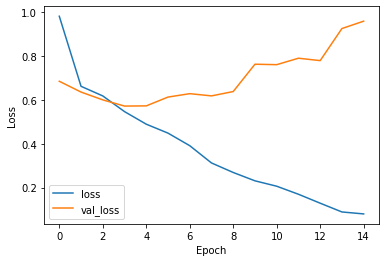

In [28]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epoch = range(len(loss))

plt.plot(epoch,loss,label='loss')
plt.plot(epoch,val_loss,label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

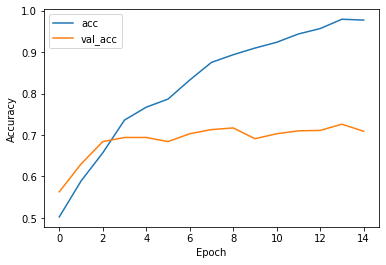

In [29]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epoch = range(len(acc))

plt.plot(epoch,acc,label='acc')
plt.plot(epoch,val_acc,label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Data Augmentation

#### Flipping

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
image_gen = ImageDataGenerator(rescale=1/255, 
                               horizontal_flip=True)

In [0]:
train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))

Found 2000 images belonging to 2 classes.


In [0]:
augmented_images= [train_data_gen[0][0][0] for i in range(5)]

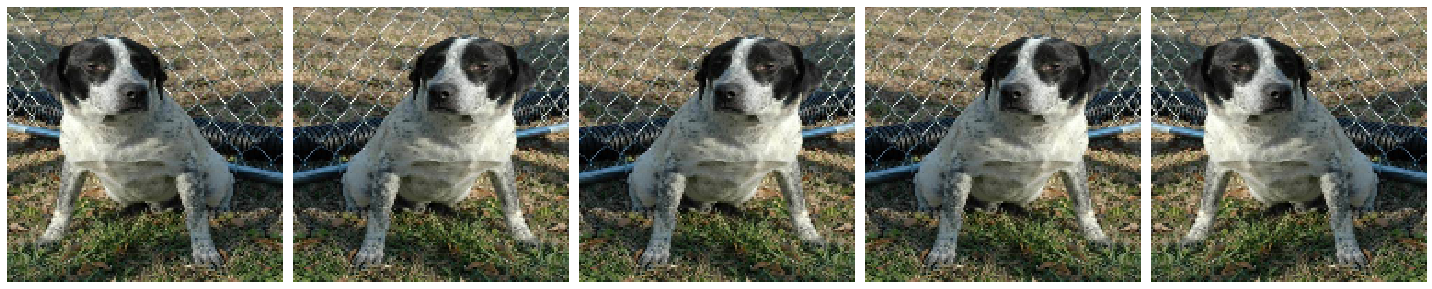

In [0]:
# Re-use the same custom plotting function defined and used
# above to visualize the training images
plotImages(augmented_images[:5])

#### Rotation

In [0]:
image_gen = ImageDataGenerator(rescale=1./255, 
                               rotation_range=45)

In [0]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

Found 2000 images belonging to 2 classes.


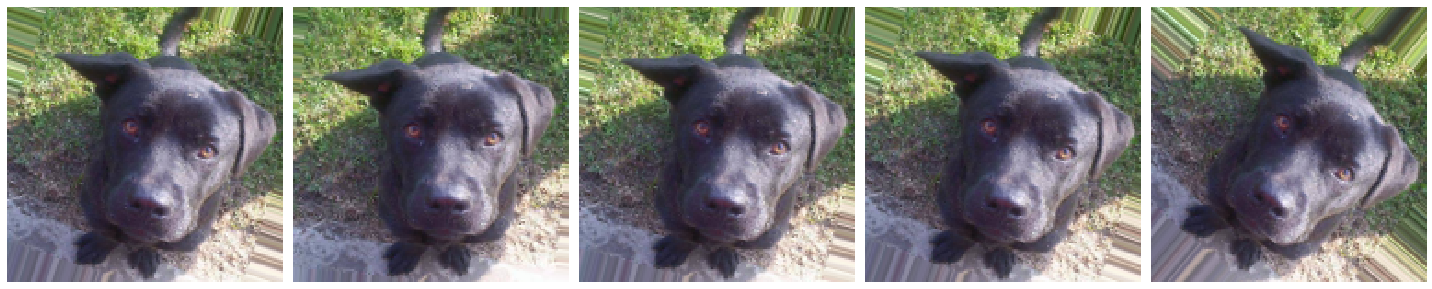

In [0]:
plotImages(augmented_images)

#### Zoom

In [0]:
image_gen = ImageDataGenerator(rescale=1./255, 
                               zoom_range=0.5)

In [0]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

Found 2000 images belonging to 2 classes.


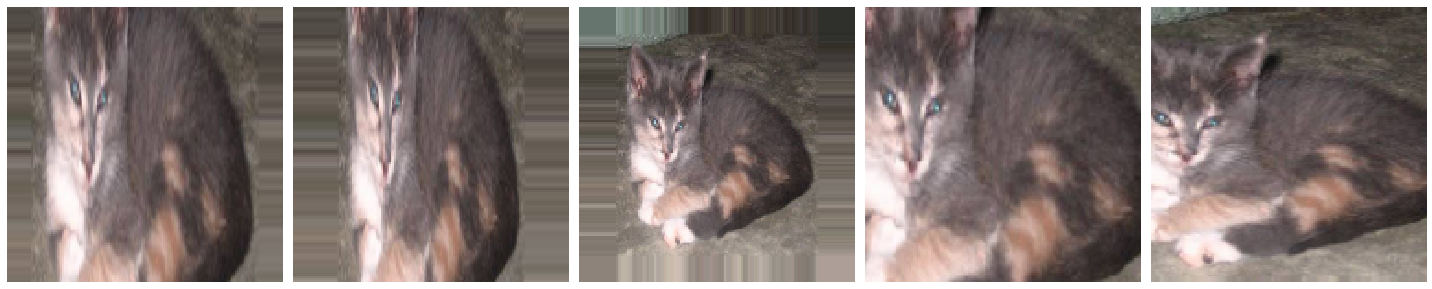

In [0]:
plotImages(augmented_images)

### Applying Data Augumentation

In [0]:
train_image_generator = ImageDataGenerator(
                    rescale=1/255,
                    rotation_range=45,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    horizontal_flip=True,
                    zoom_range=0.5
                    )
validation_image_generator = ImageDataGenerator(rescale=1./255)

In [33]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')
val_data_gen = validation_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                 directory=validation_dir,
                                                 target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                 class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


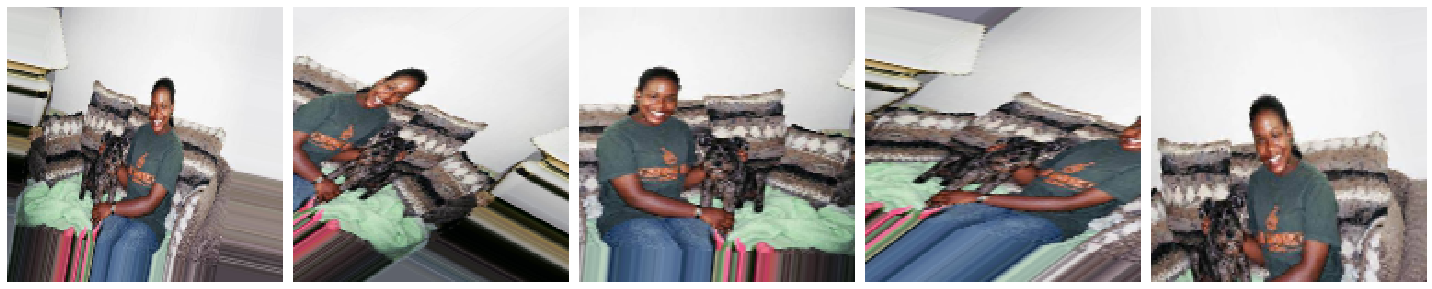

In [37]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

### Build the Model

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()

model.add(Conv2D(16, 3, padding='same', activation='relu', 
                 input_shape = (IMG_HEIGHT, IMG_WIDTH,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, 3, padding='same', activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64, 3, padding='same', activation='relu'))
model.add(MaxPooling2D())

model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [0]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 18, 18, 64)       

In [0]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy',
              metrics=['accuracy'])

### Train the Model

In [0]:
history = model.fit_generator(
    train_data_gen,
    epochs=epochs,
    validation_data=val_data_gen,
)

Epoch 1/15
15/15 [==============================] - 19s 1s/step - loss: 1.2405 - accuracy: 0.4776 - val_loss: 0.6930 - val_accuracy: 0.5170
Epoch 2/15
15/15 [==============================] - 18s 1s/step - loss: 0.6920 - accuracy: 0.5246 - val_loss: 0.6878 - val_accuracy: 0.5000
Epoch 3/15
15/15 [==============================] - 18s 1s/step - loss: 0.6890 - accuracy: 0.5251 - val_loss: 0.6805 - val_accuracy: 0.5630
Epoch 4/15
15/15 [==============================] - 17s 1s/step - loss: 0.6872 - accuracy: 0.5342 - val_loss: 0.6803 - val_accuracy: 0.6040
Epoch 5/15
15/15 [==============================] - 17s 1s/step - loss: 0.6757 - accuracy: 0.5524 - val_loss: 0.6489 - val_accuracy: 0.5960
Epoch 6/15
15/15 [==============================] - 17s 1s/step - loss: 0.6518 - accuracy: 0.5935 - val_loss: 0.6583 - val_accuracy: 0.5830
Epoch 7/15
15/15 [==============================] - 18s 1s/step - loss: 0.6603 - accuracy: 0.5885 - val_loss: 0.6741 - val_accuracy: 0.5720
Epoch 8/15
15/15 [==

### Evalaute the Model

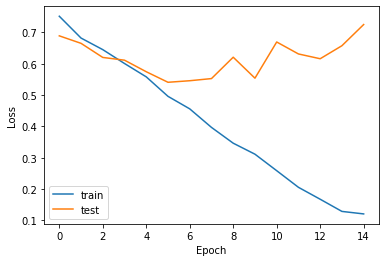

In [0]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epoch = range(len(loss))

plt.plot(epoch, loss, label='train')
plt.plot(epoch, val_loss, label='test')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

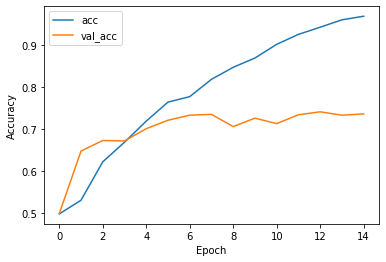

In [0]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epoch = range(len(acc))

plt.plot(epoch,acc,label='acc')
plt.plot(epoch,val_acc,label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Ex: CNN with Dropout

In [0]:
cifar10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255, x_test / 255

In [0]:
x_train.shape

(50000, 32, 32, 3)

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()

model.add(Conv2D(32, 3, padding='same', activation='relu', input_shape = (32, 32, 3)))
model.add(MaxPooling2D())
model.add(Dropout(0.5))

model.add(Conv2D(64, 3, padding='same', activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [0]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [0]:
history = model.fit(x_train, y_train, epochs=10,validation_data=(x_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 9s 179us/sample - loss: 1.5894 - accuracy: 0.4249 - val_loss: 1.3064 - val_accuracy: 0.5382
Epoch 2/10
50000/50000 [==============================] - 8s 167us/sample - loss: 1.2719 - accuracy: 0.5453 - val_loss: 1.1823 - val_accuracy: 0.5958
Epoch 3/10
50000/50000 [==============================] - 8s 166us/sample - loss: 1.1613 - accuracy: 0.5858 - val_loss: 1.0473 - val_accuracy: 0.6394
Epoch 4/10
50000/50000 [==============================] - 9s 171us/sample - loss: 1.0892 - accuracy: 0.6121 - val_loss: 1.0300 - val_accuracy: 0.6471
Epoch 5/10
50000/50000 [==============================] - 9s 172us/sample - loss: 1.0455 - accuracy: 0.6282 - val_loss: 0.9843 - val_accuracy: 0.6653
Epoch 6/10
50000/50000 [==============================] - 8s 167us/sample - loss: 1.0023 - accuracy: 0.6442 - val_loss: 0.9791 - val_accuracy: 0.6638
Epoch 7/10
50000/50000 [==========================

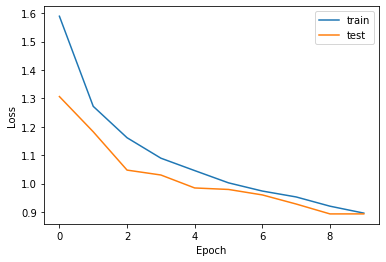

In [0]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epoch = range(len(loss))

plt.plot(epoch, loss, label='train')
plt.plot(epoch, val_loss, label='test')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

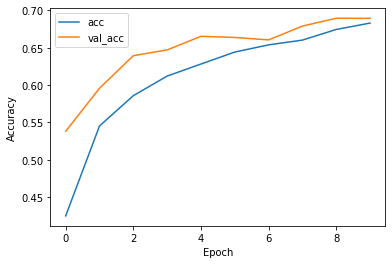

In [0]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epoch = range(len(acc))

plt.plot(epoch,acc,label='acc')
plt.plot(epoch,val_acc,label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Topic 7 Recurrent Neural Network (RNN)

## Text Classifcaiton With RNN

### Load the IMDB dataset

In [80]:
from tensorflow.keras.datasets import imdb

max_features = 20000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

17465344/17464789 [==============================] - 1s 0us/step


In [81]:
x_train.shape

(25000,)

In [82]:
x_train

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 82

In [0]:
# [len(x) for x in x_train[:10]]

[218, 189, 141, 550, 147, 43, 123, 562, 233, 130]

In [0]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

maxlen = 80
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

In [84]:
# [len(x) for x in x_train[:10]]

[80, 80, 80, 80, 80, 80, 80, 80, 80, 80]

In [85]:
x_train.shape

(25000, 80)

In [0]:
x_train[5]

In [0]:
y_train[:10]

array([1, 0, 0, 1, 0, 0, 1, 0, 1, 0])

### Build the Model

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, SimpleRNN

model = Sequential()
model.add(Embedding(max_features, 128))
model.add(SimpleRNN(128))
model.add(Dense(1, activation='sigmoid'))

In [88]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 128)         2560000   
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 128)               32896     
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 129       
Total params: 2,593,025
Trainable params: 2,593,025
Non-trainable params: 0
_________________________________________________________________


In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM

model = Sequential()
model.add(Embedding(max_features, 128))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GRU

model = Sequential()
model.add(Embedding(max_features, 128))
model.add(GRU(128))
model.add(Dense(1, activation='sigmoid'))

### Train the Model

In [0]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [0]:
history = model.fit(x_train, y_train, 
                    epochs=15,
                    validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/15
25000/25000 [==============================] - 39s 2ms/sample - loss: 0.4241 - accuracy: 0.8014 - val_loss: 0.4130 - val_accuracy: 0.8170
Epoch 2/15
25000/25000 [==============================] - 36s 1ms/sample - loss: 0.2547 - accuracy: 0.8999 - val_loss: 0.3942 - val_accuracy: 0.8384
Epoch 3/15
25000/25000 [==============================] - 36s 1ms/sample - loss: 0.1639 - accuracy: 0.9385 - val_loss: 0.4794 - val_accuracy: 0.8310
Epoch 4/15
25000/25000 [==============================] - 36s 1ms/sample - loss: 0.1140 - accuracy: 0.9567 - val_loss: 0.5519 - val_accuracy: 0.8217
Epoch 5/15
25000/25000 [==============================] - 36s 1ms/sample - loss: 0.0774 - accuracy: 0.9735 - val_loss: 0.6452 - val_accuracy: 0.8205
Epoch 6/15
25000/25000 [==============================] - 36s 1ms/sample - loss: 0.0518 - accuracy: 0.9827 - val_loss: 0.7315 - val_accuracy: 0.8228
Epoch 7/15
25000/25000 [==============================] 

### Evaluate the Model

In [0]:
score, acc = model.evaluate(x_test, y_test,batch_size=batch_size)
score, acc

25000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

(1.0591298265457154, 0.81304)

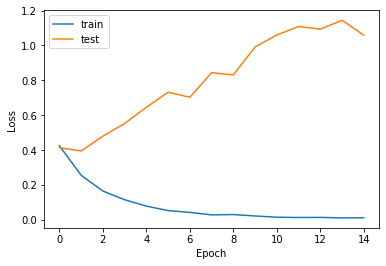

In [0]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epoch = range(len(loss))

plt.plot(epoch, loss, label='train')
plt.plot(epoch, val_loss, label='test')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

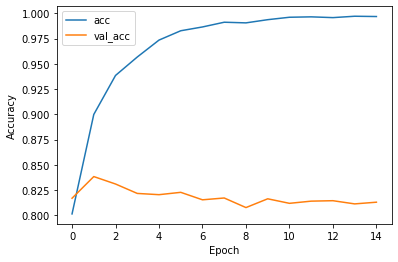

In [0]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epoch = range(len(acc))

plt.plot(epoch,acc,label='train')
plt.plot(epoch,val_acc,label='test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Ex: RNN on MNIST dataset

In [0]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential()
model.add(LSTM(32, activation='relu', input_shape=(28,28)))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [0]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 91s 2ms/sample - loss: 0.7323 - accuracy: 0.7529 - val_loss: 0.2687 - val_accuracy: 0.9156
Epoch 2/10
60000/60000 [==============================] - 90s 2ms/sample - loss: 0.2217 - accuracy: 0.9293 - val_loss: 0.1787 - val_accuracy: 0.9452
Epoch 3/10
60000/60000 [==============================] - 89s 1ms/sample - loss: 0.1498 - accuracy: 0.9538 - val_loss: 0.1221 - val_accuracy: 0.9630
Epoch 4/10
60000/60000 [==============================] - 90s 2ms/sample - loss: 0.1198 - accuracy: 0.9624 - val_loss: 0.1020 - val_accuracy: 0.9702
Epoch 5/10
60000/60000 [==============================] - 91s 2ms/sample - loss: 0.1009 - accuracy: 0.9684 - val_loss: 0.0911 - val_accuracy: 0.9702
Epoch 6/10
60000/60000 [==============================] - 91s 2ms/sample - loss: 0.0867 - accuracy: 0.9726 - val_loss: 0.0908 - val_accuracy: 0.9718
Epoch 7/10
60000/60000 [==============================] 

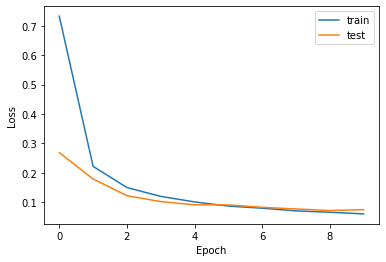

In [0]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epoch = range(len(loss))

plt.plot(epoch, loss, label='train')
plt.plot(epoch, val_loss, label='test')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

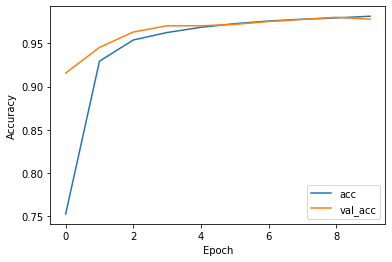

In [0]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epoch = range(len(acc))

plt.plot(epoch,acc,label='acc')
plt.plot(epoch,val_acc,label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Stack RNN Architecture

In [0]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential()
model.add(LSTM(32, activation='relu',input_shape=(28,28),return_sequences=True))
model.add(LSTM(32, activation='relu',return_sequences=True))
model.add(LSTM(32, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [0]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 140s 2ms/sample - loss: 0.5448 - accuracy: 0.8156 - val_loss: 0.1789 - val_accuracy: 0.9431
Epoch 2/10
60000/60000 [==============================] - 138s 2ms/sample - loss: 0.1629 - accuracy: 0.9493 - val_loss: 0.1065 - val_accuracy: 0.9664
Epoch 3/10
60000/60000 [==============================] - 144s 2ms/sample - loss: 0.1178 - accuracy: 0.9639 - val_loss: 0.0811 - val_accuracy: 0.9765
Epoch 4/10
60000/60000 [==============================] - 140s 2ms/sample - loss: 0.0906 - accuracy: 0.9718 - val_loss: 0.1267 - val_accuracy: 0.9596
Epoch 5/10
60000/60000 [==============================] - 139s 2ms/sample - loss: 0.0782 - accuracy: 0.9760 - val_loss: 0.0725 - val_accuracy: 0.9777
Epoch 6/10
60000/60000 [==============================] - 137s 2ms/sample - loss: 0.0654 - accuracy: 0.9796 - val_loss: 0.0654 - val_accuracy: 0.9798
Epoch 7/10
60000/60000 [==========================

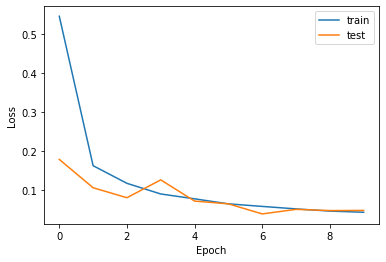

In [0]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epoch = range(len(loss))

plt.plot(epoch, loss, label='train')
plt.plot(epoch, val_loss, label='test')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

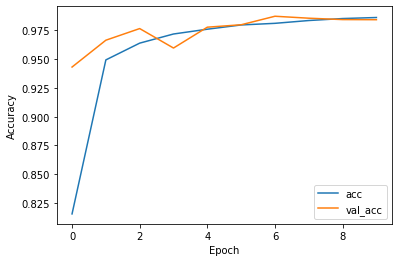

In [0]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epoch = range(len(acc))

plt.plot(epoch,acc,label='acc')
plt.plot(epoch,val_acc,label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Bidirectional RNN Architecuture

In [0]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense

model = Sequential()
model.add(Bidirectional(LSTM(32, input_shape=(28,28))))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [0]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [0]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test,y_test))

In [0]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epoch = range(len(loss))

plt.plot(epoch, loss, label='train')
plt.plot(epoch, val_loss, label='test')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epoch = range(len(acc))

plt.plot(epoch,acc,label='acc')
plt.plot(epoch,val_acc,label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Topic 8 Transfer Learning & Tensorflow Hub

## Model Demo

In [0]:
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image

In [0]:
img = image.load_img('bird.png', target_size=(224,224))

In [0]:
img

In [45]:
x = image.img_to_array(img)
x.shape

(224, 224, 3)

In [46]:
model = VGG16()

553467904/553467096 [==============================] - 11s 0us/step


In [47]:
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [0]:
# predictions = model.predict(x)

In [0]:
import numpy as np
x = np.expand_dims(x,axis=0)

In [50]:
x.shape

(1, 224, 224, 3)

In [0]:
predictions = model.predict(x)
print(predictions)

In [52]:
classes = decode_predictions(predictions,top=3)
classes

40960/35363 [==================================] - 0s 0us/step


[[('n01796340', 'ptarmigan', 0.66394585),
  ('n01530575', 'brambling', 0.12799448),
  ('n01807496', 'partridge', 0.0460042)]]

## Fine Tuning

### Step 1: Data Augmentation

### Step 2: Pre-Trained Base Model

In [55]:
from tensorflow.keras.applications import MobileNet
base_model=MobileNet(weights='imagenet') 

17227776/17225924 [==============================] - 1s 0us/step


In [56]:
len(base_model.layers)

93

In [57]:
base_model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32

In [0]:
from tensorflow.keras.applications import MobileNet
base_model=MobileNet(weights='imagenet',include_top=False) 

In [63]:
base_model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, None, None, 3)     0         
_________________________________________________________________
conv1 (Conv2D)               (None, None, None, 32)    864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, None, None, 32)    128       
_________________________________________________________________
conv1_relu (ReLU)            (None, None, None, 32)    0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, None, None, 32)    288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, None, None, 

In [60]:
len(base_model.layers)

87

### Step 3: Add new layer

In [0]:
# from tensorflow.keras.layers import Dense,GlobalAveragePooling2D
# from tensorflow.keras.models import Model

# x=base_model.output
# x=GlobalAveragePooling2D()(x) # Flatten
# x=Dense(1024,activation='relu')(x) 
# x=Dense(1024,activation='relu')(x) 
# x=Dense(512,activation='relu')(x) 
# preds=Dense(1,activation='sigmoid')(x) 

# model=Model(inputs=base_model.input,outputs=preds)

In [0]:
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(1024, activation = 'relu'))
model.add(Dense(512, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [62]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_1.00_224 (Model)   (None, None, None, 1024)  3228864   
_________________________________________________________________
global_average_pooling2d_1 ( (None, 1024)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_7 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_8 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 129       
Total params: 4,869,057
Trainable params: 4,847,169
Non-trainable params: 21,888
_______________________________________

In [64]:
model.layers[-5:]

In [0]:
for layer in model.layers[:-5]:
    layer.trainable=False
for layer in model.layers[-5:]:
    layer.trainable=True

In [66]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_1.00_224 (Model)   (None, None, None, 1024)  3228864   
_________________________________________________________________
global_average_pooling2d_1 ( (None, 1024)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_7 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_8 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 129       
Total params: 4,869,057
Trainable params: 1,640,193
Non-trainable params: 3,228,864
____________________________________

### Step 4: Train model

In [0]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [68]:
from tensorflow.keras.callbacks import EarlyStopping

history = model.fit_generator(
    train_data_gen,
    epochs=30,
    validation_data=val_data_gen,
    callbacks = [EarlyStopping(monitor='val_loss', patience=2, verbose=2, restore_best_weights = True)]
)

Epoch 1/30
16/16 [==============================] - 22s 1s/step - loss: 0.6172 - accuracy: 0.7420 - val_loss: 0.2107 - val_accuracy: 0.9290
Epoch 2/30
16/16 [==============================] - 19s 1s/step - loss: 0.2495 - accuracy: 0.8965 - val_loss: 0.1026 - val_accuracy: 0.9640
Epoch 3/30
16/16 [==============================] - 19s 1s/step - loss: 0.2324 - accuracy: 0.9000 - val_loss: 0.0906 - val_accuracy: 0.9700
Epoch 4/30
16/16 [==============================] - 19s 1s/step - loss: 0.2069 - accuracy: 0.9130 - val_loss: 0.1186 - val_accuracy: 0.9580
Epoch 5/30
16/16 [==============================] - 19s 1s/step - loss: 0.2276 - accuracy: 0.9025 - val_loss: 0.0831 - val_accuracy: 0.9670
Epoch 6/30
16/16 [==============================] - 19s 1s/step - loss: 0.1966 - accuracy: 0.9195 - val_loss: 0.0856 - val_accuracy: 0.9670
Epoch 7/30
16/16 [==============================] - 19s 1s/step - loss: 0.1956 - accuracy: 0.9210 - val_loss: 0.0822 - val_accuracy: 0.9650
Epoch 8/30
16/16 [==

In [70]:
model.evaluate_generator(val_data_gen)

[0.07705404842272401, 0.971]

In [0]:
preds = model.predict_generator(val_data_gen)

In [72]:
preds[:10]

array([[9.9995947e-01],
       [1.1831522e-05],
       [9.6103811e-01],
       [5.6675076e-04],
       [9.9990869e-01],
       [2.0861626e-07],
       [0.0000000e+00],
       [6.0230494e-05],
       [3.2782555e-05],
       [3.3766031e-05]], dtype=float32)

In [78]:
# Numpy
preds.round().flatten().astype(int)

array([1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,

#### Test the Dog Image

57344/49553 [==================================] - 0s 0us/step


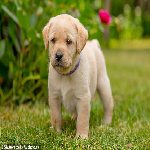

In [0]:
import numpy as np
import PIL.Image as Image

img = tf.keras.utils.get_file('image1.jpg',
                              'https://i.dailymail.co.uk/1s/2019/11/23/09/21370544-7717313-image-a-1_1574501083030.jpg')
                              # 'https://images.all-free-download.com/images/graphicthumb/dogs_dog_animal_215598.jpg')
img = Image.open(img).resize((150,150))
img

In [0]:
img = np.array(img)/255.0
img.shape

(150, 150, 3)

In [0]:
img = np.expand_dims(img, axis=0)
img.shape

(1, 150, 150, 3)

In [0]:
result = model.predict(img)
result

array([[1.]], dtype=float32)

In [0]:
round(result[0][0])

1.0

#### Test the Cat Image

65536/60717 [================================] - 0s 6us/step


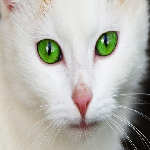

In [0]:
import numpy as np
import PIL.Image as Image

img = tf.keras.utils.get_file('image10.jpg',
                              # 'https://www.thesprucepets.com/thmb/wd4VS5A5UCHLF0IBG-DsVfrLypk=/960x0/filters:no_upscale():max_bytes(150000):strip_icc()/horse-galloping-in-grass-688899769-587673275f9b584db3a44cdf.jpg')
                              'https://images.all-free-download.com/images/graphicthumb/cat_with_green_eyes_194623.jpg')
img = Image.open(img).resize((150,150))
img

In [0]:
img = np.array(img)/255.0
img = np.expand_dims(img, axis=0)

In [0]:
result = model.predict(img)
round(result[0][0])

0.0

## Tenssorflow Hub

In [0]:
import tensorflow_hub as hub

In [0]:
classifier_url ="https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4" 

In [0]:
classifier = tf.keras.Sequential([hub.KerasLayer(classifier_url, input_shape=(224,224,3))])

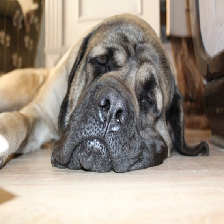

In [0]:
import numpy as np
import PIL.Image as Image

img = tf.keras.utils.get_file('image.jpg','https://images.all-free-download.com/images/graphicthumb/dogs_dog_animal_215598.jpg')
img = Image.open(img).resize((224,224))
img

In [0]:
img = np.array(img)/255.0
img = np.expand_dims(img, axis=0)

In [0]:
result = classifier.predict(img)
result

array([[ 0.19942084, -0.50989014,  0.4426471 , ...,  0.77951974,
        -0.16284469,  0.7057946 ]], dtype=float32)

In [0]:
predicted_class = np.argmax(result[0])
predicted_class

244

In [0]:
labels_path = tf.keras.utils.get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
imagenet_labels = np.array(open(labels_path).read().splitlines())

Text(0.5, 1.0, 'Prediction: Bull Mastiff')

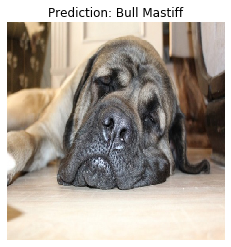

In [0]:
plt.imshow(img[0])
plt.axis('off')
predicted_class_name = imagenet_labels[predicted_class]
plt.title("Prediction: " + predicted_class_name.title())

# (Optional) Topic 9 Functional API

## Sequential Model as Function

### MNIST data

In [0]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
def nn_model():
    model = keras.models.Sequential([
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
    return model

In [0]:
model = nn_model()
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_17 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_18 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_19 (Dense)             (None, 10)                330       
Total params: 111,146
Trainable params: 111,146
Non-trainable params: 0
_________________________________________________________________


### Fashion MNIST data

In [0]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
model = nn_model()
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_21 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_22 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_23 (Dense)             (None, 10)                330       
Total params: 111,146
Trainable params: 111,146
Non-trainable params: 0
_________________________________________________________________


In [0]:
history = model.fit(x_train,y_train,epochs=10, validation_data=(x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 92us/sample - loss: 0.5091 - accuracy: 0.8178 - val_loss: 0.4220 - val_accuracy: 0.8489
Epoch 2/10
60000/60000 [==============================] - 5s 86us/sample - loss: 0.3724 - accuracy: 0.8644 - val_loss: 0.4195 - val_accuracy: 0.8495
Epoch 3/10
60000/60000 [==============================] - 5s 86us/sample - loss: 0.3366 - accuracy: 0.8766 - val_loss: 0.3754 - val_accuracy: 0.8614
Epoch 4/10
60000/60000 [==============================] - 5s 84us/sample - loss: 0.3135 - accuracy: 0.8853 - val_loss: 0.3444 - val_accuracy: 0.8755
Epoch 5/10
60000/60000 [==============================] - 5s 84us/sample - loss: 0.2987 - accuracy: 0.8895 - val_loss: 0.3561 - val_accuracy: 0.8724
Epoch 6/10
60000/60000 [==============================] - 5s 84us/sample - loss: 0.2857 - accuracy: 0.8944 - val_loss: 0.3410 - val_accuracy: 0.8773
Epoch 7/10
60000/60000 [==============================] 

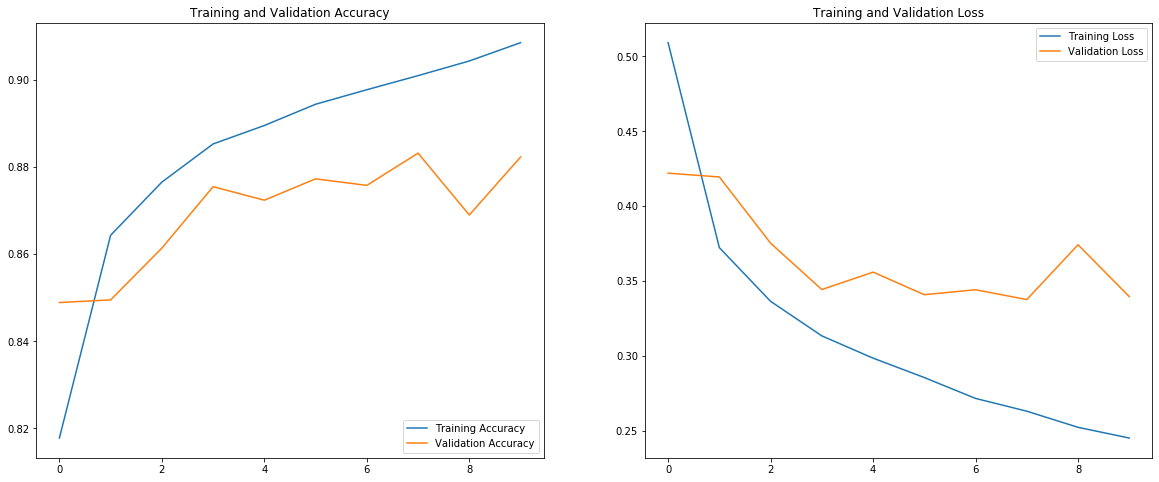

In [0]:
import matplotlib.pyplot as plt 

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Exercise

In [0]:
def nn_model(lr):
    model = keras.models.Sequential([
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dense(10, activation='softmax')
    ])
    optimizer = tf.keras.optimizers.Adam(lr)
    model.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy',metrics=['accuracy'])
    return model

In [0]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

lr = [0.001,0.01,0.1]
acc=[]
for i in lr:
    model = nn_model(i)
    model.fit(x_train,y_train,verbose=0)
    loss,accuracy = model.evaluate(x_test,y_test)
    acc.append(accuracy)


10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

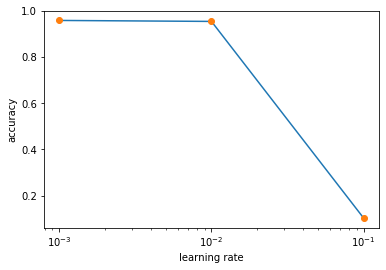

In [0]:
import matplotlib.pyplot as plt

plt.semilogx(lr,acc)
plt.semilogx(lr,acc,'o')
plt.xlabel('learning rate')
plt.ylabel('accuracy')
plt.show()

## Layers as Function

In [0]:
from tensorflow.keras import layers

inputs = keras.Input(shape=(784,), name='img')
x = layers.Dense(64, activation='relu')(inputs)
x = layers.Dense(32, activation='relu')(x)
outputs = layers.Dense(10, activation='softmax')(x)

model = keras.Model(inputs=inputs, outputs=outputs, name='mnist_model')

In [0]:
model.summary()

Model: "mnist_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 784)]             0         
_________________________________________________________________
dense_36 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_37 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_38 (Dense)             (None, 10)                330       
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [0]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train.reshape(60000, 784).astype('float32') / 255
x_test = x_test.reshape(10000, 784).astype('float32') / 255

model.compile(loss='sparse_categorical_crossentropy',optimizer=keras.optimizers.RMSprop(),metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=64, epochs=5,validation_data=(x_test,y_test))
test_scores = model.evaluate(x_test, y_test, verbose=2)
print('Test loss:', test_scores[0])
print('Test accuracy:', test_scores[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 54us/sample - loss: 0.3362 - accuracy: 0.9050 - val_loss: 0.1846 - val_accuracy: 0.9435
Epoch 2/5
60000/60000 [==============================] - 3s 48us/sample - loss: 0.1584 - accuracy: 0.9538 - val_loss: 0.1418 - val_accuracy: 0.9563
Epoch 3/5
60000/60000 [==============================] - 3s 48us/sample - loss: 0.1169 - accuracy: 0.9653 - val_loss: 0.1191 - val_accuracy: 0.9635
Epoch 4/5
60000/60000 [==============================] - 3s 47us/sample - loss: 0.0940 - accuracy: 0.9720 - val_loss: 0.1073 - val_accuracy: 0.9682
Epoch 5/5
60000/60000 [==============================] - 3s 49us/sample - loss: 0.0797 - accuracy: 0.9769 - val_loss: 0.1020 - val_accuracy: 0.9713
10000/1 - 1s - loss: 0.0518 - accuracy: 0.9713
Test loss: 0.10203988611618989
Test accuracy: 0.9713


In [0]:
model.save('model.h5')
del model
# Recreate the exact same model purely from the file:
model = keras.models.load_model('model.h5')

###Ensembling with Nested Models

In [0]:
from tensorflow.keras import layers

def get_model():
  inputs = keras.Input(shape=(128,))
  outputs = layers.Dense(1, activation='sigmoid')(inputs)
  return keras.Model(inputs, outputs)

model1 = get_model()
model2 = get_model()
model3 = get_model()

inputs = keras.Input(shape=(128,))
y1 = model1(inputs)
y2 = model2(inputs)
y3 = model3(inputs)
outputs = layers.average([y1, y2, y3])
ensemble_model = keras.Model(inputs=inputs, outputs=outputs)

In [0]:
keras.utils.plot_model(ensemble_model, 'model.png')
# keras.utils.plot_model(model, 'model.png', show_shapes=True)


### Autoencoder

In [0]:
from tensorflow.keras import layers 
encoder_input = keras.Input(shape=(28, 28, 1), name='original_img')
x = layers.Conv2D(16, 3, activation='relu')(encoder_input)
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(3)(x)
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.Conv2D(16, 3, activation='relu')(x)
encoder_output = layers.GlobalMaxPooling2D()(x)

encoder = keras.Model(encoder_input, encoder_output, name='encoder')
encoder.summary()

decoder_input = keras.Input(shape=(16,), name='encoded_img')
x = layers.Reshape((4, 4, 1))(decoder_input)
x = layers.Conv2DTranspose(16, 3, activation='relu')(x)
x = layers.Conv2DTranspose(32, 3, activation='relu')(x)
x = layers.UpSampling2D(3)(x)
x = layers.Conv2DTranspose(16, 3, activation='relu')(x)
decoder_output = layers.Conv2DTranspose(1, 3, activation='relu')(x)

decoder = keras.Model(decoder_input, decoder_output, name='decoder')
decoder.summary()

autoencoder_input = keras.Input(shape=(28, 28, 1), name='img')
encoded_img = encoder(autoencoder_input)
decoded_img = decoder(encoded_img)
autoencoder = keras.Model(autoencoder_input, decoded_img, name='autoencoder')
autoencoder.summary()

In [0]:
keras.utils.plot_model(autoencoder, 'model.png')
# keras.utils.plot_model(model, 'model.png', show_shapes=True)

### Toy Resnet

In [0]:
inputs = keras.Input(shape=(32, 32, 3), name='img')
x = layers.Conv2D(32, 3, activation='relu')(inputs)
x = layers.Conv2D(64, 3, activation='relu')(x)
block_1_output = layers.MaxPooling2D(3)(x)

x = layers.Conv2D(64, 3, activation='relu', padding='same')(block_1_output)
x = layers.Conv2D(64, 3, activation='relu', padding='same')(x)
block_2_output = layers.add([x, block_1_output])

x = layers.Conv2D(64, 3, activation='relu', padding='same')(block_2_output)
x = layers.Conv2D(64, 3, activation='relu', padding='same')(x)
block_3_output = layers.add([x, block_2_output])

x = layers.Conv2D(64, 3, activation='relu')(block_3_output)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(10, activation='softmax')(x)

model = keras.Model(inputs, outputs, name='toy_resnet')
model.summary()

In [0]:
keras.utils.plot_model(model, 'mini_resnet.png', show_shapes=True)

In [0]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

model.compile(optimizer=keras.optimizers.RMSprop(1e-3),
              loss='categorical_crossentropy',
              metrics=['acc'])
model.fit(x_train, y_train,
          batch_size=64,
          epochs=1,
          validation_split=0.2)

In [0]:
loss,acc = model.evaluate(x_test,  y_test, verbose=2)
print("Accuracy: {:5.2f}%".format(100*acc))

### Multiple Inputs and Outputs

In [0]:
num_tags = 12  # Number of unique issue tags
num_words = 10000  # Size of vocabulary obtained when preprocessing text data
num_departments = 4  # Number of departments for predictions

title_input = keras.Input(shape=(None,), name='title')  # Variable-length sequence of ints
body_input = keras.Input(shape=(None,), name='body')  # Variable-length sequence of ints
tags_input = keras.Input(shape=(num_tags,), name='tags')  # Binary vectors of size `num_tags`

# Embed each word in the title into a 64-dimensional vector
title_features = layers.Embedding(num_words, 64)(title_input)
# Embed each word in the text into a 64-dimensional vector
body_features = layers.Embedding(num_words, 64)(body_input)

# Reduce sequence of embedded words in the title into a single 128-dimensional vector
title_features = layers.LSTM(128)(title_features)
# Reduce sequence of embedded words in the body into a single 32-dimensional vector
body_features = layers.LSTM(32)(body_features)

# Merge all available features into a single large vector via concatenation
x = layers.concatenate([title_features, body_features, tags_input])

# Stick a logistic regression for priority prediction on top of the features
priority_pred = layers.Dense(1, activation='sigmoid', name='priority')(x)
# Stick a department classifier on top of the features
department_pred = layers.Dense(num_departments, activation='softmax', name='department')(x)

# Instantiate an end-to-end model predicting both priority and department
model = keras.Model(inputs=[title_input, body_input, tags_input],
                    outputs=[priority_pred, department_pred])

In [0]:
keras.utils.plot_model(model, 'multi_input_and_output_model.png', show_shapes=True)

## Ex: Funcational API

In [0]:
from tensorflow.keras import layers

inputs = keras.Input(shape=(32, 32, 3), name='img')

x = layers.Conv2D(32,(3,3), activation='relu',padding='same')(inputs)
x = layers.Conv2D(64,(3,3), activation='relu',padding='same')(x)
y1 = layers.MaxPooling2D((2,2))(x)

x = layers.Conv2D(16,(3,3), activation='relu',padding='same')(inputs)
x = layers.Conv2D(32,(3,3), activation='relu',padding='same')(x)
x = layers.Conv2D(64,(3,3), activation='relu',padding='same')(x)
y2 = layers.MaxPooling2D((2,2))(x)

y3 = layers.concatenate([y1, y2])
y4 = layers.Flatten()(y3)
y5 = layers.Dense(128,activation='softmax')(y4)
outputs = layers.Dense(10,activation='softmax')(y5)

model = keras.Model(inputs, outputs, name='dual_cnn')

In [0]:
# keras.utils.plot_model(model, 'model.png')
keras.utils.plot_model(model, 'model.png', show_shapes=True)

# (Optional) Topic 10 TF.Data

### Python generator

In [0]:
def count(stop):
  i = 0
  while i<stop:
    yield i
    i += 1

In [0]:
for n in count(5):
  print(n)

0
1
2
3
4


In [0]:
it = count(5)

In [0]:
next(it)

2

### Basic Mechanics

In [0]:
dataset = tf.data.Dataset.from_tensor_slices([8, 3, 0, 8, 2, 1])
dataset

<TensorSliceDataset shapes: (), types: tf.int32>

In [0]:
for i in dataset:
  print(i)

tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)


In [0]:
it = iter(dataset)

In [0]:
next(it)

<tf.Tensor: id=197, shape=(), dtype=int32, numpy=8>

In [0]:
mapped = dataset.map(lambda value: value + 2)

In [0]:
for i in mapped:
  print(i)

tf.Tensor(10, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(10, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)


In [0]:
dataset.reduce(0, lambda state, value: state + value)

<tf.Tensor: id=157, shape=(), dtype=int32, numpy=22>

### Dataset structure

In [0]:
dataset1 = tf.data.Dataset.from_tensor_slices(tf.random.uniform([4, 10]))
dataset1

<TensorSliceDataset shapes: (10,), types: tf.float32>

In [0]:
it1 = iter(dataset1)

In [0]:
next(it1)

<tf.Tensor: id=320, shape=(10,), dtype=float32, numpy=
array([0.7425175 , 0.44699085, 0.25783074, 0.664232  , 0.2763667 ,
       0.19958127, 0.131302  , 0.8570808 , 0.9484348 , 0.644187  ],
      dtype=float32)>

In [0]:
dataset2 = tf.data.Dataset.from_tensor_slices(
   (tf.random.uniform([4]),
    tf.random.uniform([4, 100], maxval=100, dtype=tf.int32)))

dataset2

<TensorSliceDataset shapes: ((), (100,)), types: (tf.float32, tf.int32)>

In [0]:
it2 = iter(dataset2)

In [0]:
next(it2)

(<tf.Tensor: id=389, shape=(), dtype=float32, numpy=0.18927693>,
 <tf.Tensor: id=390, shape=(100,), dtype=int32, numpy=
 array([93, 16, 97,  9, 95, 97, 53, 23, 83, 12, 16, 82, 50, 60, 97, 68, 25,
        30,  9, 42, 45, 11, 71, 35, 58, 10, 19, 17, 46, 46,  9, 15, 82, 90,
         7, 57, 44, 52, 33, 49, 59, 95, 59, 54, 51, 66, 95, 13, 69, 29, 55,
        14, 19, 32, 88, 67, 74, 63, 19, 77, 19, 14, 66, 88, 65,  3, 98, 50,
        16, 67, 36,  6,  6, 42,  0, 91, 10, 76, 86, 53, 89, 24,  9, 76, 31,
        29, 99,  8, 11,  0, 87, 60, 11,  7, 14,  7, 55, 97, 57, 40],
       dtype=int32)>)

In [0]:
dataset3 = tf.data.Dataset.zip((dataset1, dataset2))
dataset3

<ZipDataset shapes: ((10,), ((), (100,))), types: (tf.float32, (tf.float32, tf.int32))>

In [0]:
it3 = iter(dataset3)

In [0]:
next(it3)

(<tf.Tensor: id=406, shape=(10,), dtype=float32, numpy=
 array([0.7425175 , 0.44699085, 0.25783074, 0.664232  , 0.2763667 ,
        0.19958127, 0.131302  , 0.8570808 , 0.9484348 , 0.644187  ],
       dtype=float32)>,
 (<tf.Tensor: id=407, shape=(), dtype=float32, numpy=0.18927693>,
  <tf.Tensor: id=408, shape=(100,), dtype=int32, numpy=
  array([93, 16, 97,  9, 95, 97, 53, 23, 83, 12, 16, 82, 50, 60, 97, 68, 25,
         30,  9, 42, 45, 11, 71, 35, 58, 10, 19, 17, 46, 46,  9, 15, 82, 90,
          7, 57, 44, 52, 33, 49, 59, 95, 59, 54, 51, 66, 95, 13, 69, 29, 55,
         14, 19, 32, 88, 67, 74, 63, 19, 77, 19, 14, 66, 88, 65,  3, 98, 50,
         16, 67, 36,  6,  6, 42,  0, 91, 10, 76, 86, 53, 89, 24,  9, 76, 31,
         29, 99,  8, 11,  0, 87, 60, 11,  7, 14,  7, 55, 97, 57, 40],
        dtype=int32)>))

### Demo

In [0]:
import tensorflow as tf

from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model

In [0]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

x_train.shape

11493376/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)

In [0]:
# Add a channels dimension
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]
x_train.shape

(60000, 28, 28, 1)

In [0]:
train_ds = tf.data.Dataset.from_tensor_slices(
    (x_train, y_train)).shuffle(10000).batch(32)

test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32)

In [0]:
class MyModel(Model):
  
  def __init__(self):
    super().__init__()
    self.conv1 = Conv2D(32, 3, activation='relu')
    self.flatten = Flatten()
    self.d1 = Dense(128, activation='relu')
    self.d2 = Dense(10, activation='softmax')

  def call(self, x):
    x = self.conv1(x)
    x = self.flatten(x)
    x = self.d1(x)
    return self.d2(x)

In [0]:
# Create an instance of the model
model = MyModel()

In [0]:
model.compile(loss = 'sparse_categorical_crossentropy')

In [0]:
model.fit(x_train, y_train, epochs=5)

In [0]:
class MyModel(Model):
  
  def __init__(self):
    super().__init__()
    self.conv1 = Conv2D(32, 3, activation='relu')
    self.flatten = Flatten()
    self.d1 = Dense(128, activation='relu')
    self.d2 = Dense(10, activation='softmax')

  def call(self, x):
    x = self.conv1(x)
    x = self.flatten(x)
    x = self.d1(x)
    return self.d2(x)

In [0]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam()

In [0]:
train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')

test_loss = tf.keras.metrics.Mean(name='test_loss')
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='test_accuracy')

In [0]:
@tf.function
def train_step(images, labels):
  with tf.GradientTape() as tape:
    predictions = model(images)
    loss = loss_object(labels, predictions)
  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))

  train_loss(loss)
  train_accuracy(labels, predictions)

In [0]:
@tf.function
def test_step(images, labels):
  predictions = model(images)
  t_loss = loss_object(labels, predictions)

  test_loss(t_loss)
  test_accuracy(labels, predictions)

In [0]:
EPOCHS = 5

for epoch in range(EPOCHS):
  for images, labels in train_ds:
    train_step(images, labels)

  for test_images, test_labels in test_ds:
    test_step(test_images, test_labels)

  template = 'Epoch {}, Loss: {}, Accuracy: {}, Test Loss: {}, Test Accuracy: {}'
  print(template.format(epoch+1,
                        train_loss.result(),
                        train_accuracy.result()*100,
                        test_loss.result(),
                        test_accuracy.result()*100))

  # Reset the metrics for the next epoch
  train_loss.reset_states()
  train_accuracy.reset_states()
  test_loss.reset_states()
  test_accuracy.reset_states()


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Epoch 1, Loss: 0.028334543108940125, Accuracy: 99.12999725341797, Test Loss: 0.057672739028930664, Test Accuracy: 98.23999786376953
Epoch 2, Loss: 0.011782018467783928, Accuracy: 99.59166717529297, Test Loss: 0.06344366818666458, Test Accuracy: 98.37999725341797
Epoch 3, Loss: 0.0076974364928901196, Accuracy: 99.73333740234375, Test Loss: 0.06378548592329025, Test Accuracy: 98.50999450683594
Epoch 4, Loss: 0.007346201688051224, Accuracy: 99.77999877929688, Test Loss: 0.0694119855761528, Test Accuracy: 9